
Our dataset consists of clinical data from patients who entered the hospital complaining of chest pain ("angina") during exercise.  The information collected includes:

* `age` : Age of the patient

* `sex` : Sex of the patient

* `cp` : Chest Pain type

    + Value 0: asymptomatic
    + Value 1: typical angina
    + Value 2: atypical angina
    + Value 3: non-anginal pain
   
    
* `trtbps` : resting blood pressure (in mm Hg)

* `chol` : cholesterol in mg/dl fetched via BMI sensor

* `restecg` : resting electrocardiographic results

    + Value 0: normal
    + Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    + Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

* `thalach` : maximum heart rate achieved during exercise

* `output` : the doctor's diagnosis of whether the patient is at risk for a heart attack
    + 0 = not at risk of heart attack
    + 1 = at risk of heart attack

In [9]:
## library imports here
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [8]:
ha = pd.read_csv("https://www.dropbox.com/s/aohbr6yb9ifmc8w/heart_attack.csv?dl=1")

## Q1: Natural Multiclass Models

Fit a multiclass KNN, Decision Tree, and LDA for the heart disease data; this time predicting the type of chest pain (categories 0 - 3) that a patient experiences.  For the decision tree, plot the fitted tree, and interpret the first couple splits.


In [10]:
X = ha.drop('cp', axis=1)
y = ha['cp']

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (273, 7)
Shape of y: (273,)


In [11]:
ha = pd.read_csv("https://www.dropbox.com/s/aohbr6yb9ifmc8w/heart_attack.csv?dl=1")
X = ha.drop('cp', axis=1)
y = ha['cp']

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (273, 7)
Shape of y: (273,)


In [12]:
import pandas as pd

ha = pd.read_csv("https://www.dropbox.com/s/aohbr6yb9ifmc8w/heart_attack.csv?dl=1")
X = ha.drop('cp', axis=1)
y = ha['cp']

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (273, 7)
Shape of y: (273,)


In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

knn_pipeline = Pipeline([
    ('knn', KNeighborsClassifier())
])

knn_pipeline.fit(X, y)
print("KNN pipeline fitted successfully.")

KNN pipeline fitted successfully.


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

dt_pipeline = Pipeline([
    ('dt', DecisionTreeClassifier())
])

dt_pipeline.fit(X, y)
print("Decision Tree pipeline fitted successfully.")

Decision Tree pipeline fitted successfully.


In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import Pipeline

lda_pipeline = Pipeline([
    ('lda', LinearDiscriminantAnalysis())
])

lda_pipeline.fit(X, y)
print("LDA pipeline fitted successfully.")

LDA pipeline fitted successfully.


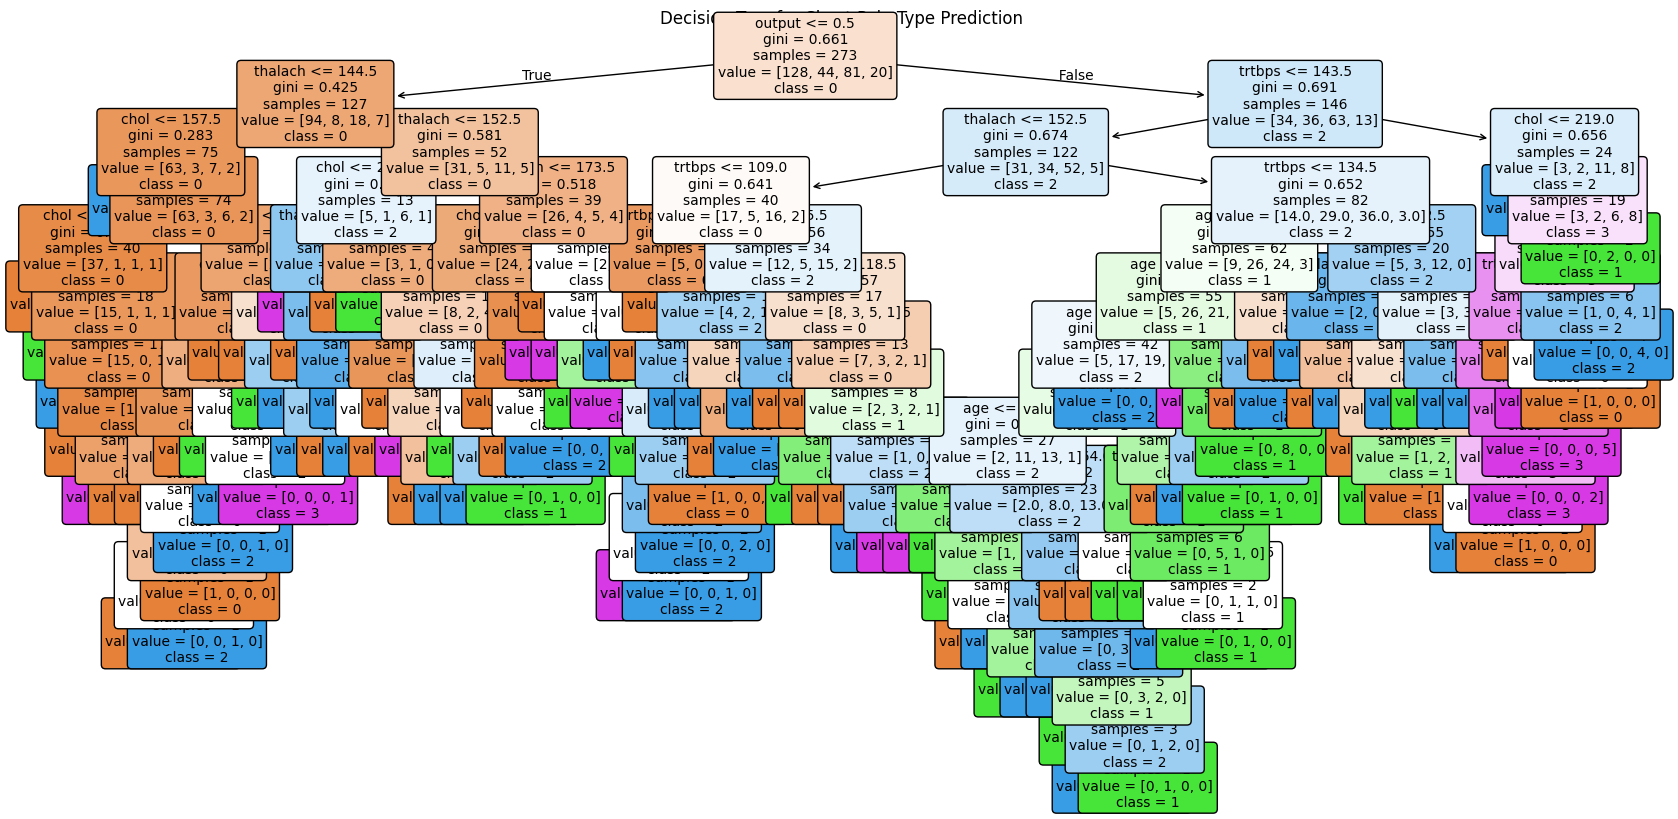

Decision Tree plotted successfully.


In [16]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Get the fitted Decision Tree model from the pipeline
dt_model = dt_pipeline.named_steps['dt']

# Get feature names from the DataFrame X
feature_names = X.columns.tolist()

# Get class names (unique values of y)
class_names = [str(c) for c in sorted(y.unique())]

plt.figure(figsize=(20, 10))
plot_tree(dt_model,
          feature_names=feature_names,
          class_names=class_names,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree for Chest Pain Type Prediction")
plt.show()

print("Decision Tree plotted successfully.")

Q2: OvR

Create a new column in the ha dataset called cp_is_3, which is equal to 1 if the cp variable is equal to 3 and 0 otherwise.

Then, fit a Logistic Regression to predict this new target, and report the F1 Score.

Repeat for the other three cp categories. Which category was the OvR approach best at distinguishing?


In [20]:
for category in range(4):
    ha[f'cp_is_{category}'] = (ha['cp'] == category).astype(int)

print("New binary columns for 'cp' categories created successfully.")
print(ha[['cp', 'cp_is_0', 'cp_is_1', 'cp_is_2', 'cp_is_3']].head())

New binary columns for 'cp' categories created successfully.
   cp  cp_is_0  cp_is_1  cp_is_2  cp_is_3
0   3        0        0        0        1
1   2        0        0        1        0
2   1        0        1        0        0
3   0        1        0        0        0
4   0        1        0        0        0


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

def evaluate_ovr_logistic_regression(target_column_name):
    # 3a. Create the feature DataFrame X
    # We need to drop the original 'cp' column and ALL 'cp_is_X' columns except the current target_column_name
    # The original features are 'age', 'sex', 'trtbps', 'chol', 'restecg', 'thalach', 'output'
    original_features = ['age', 'sex', 'trtbps', 'chol', 'restecg', 'thalach', 'output']
    X = ha[original_features]

    # 3b. Create the target Series y
    y = ha[target_column_name]

    # 3c. Split X and y into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 3d. Instantiate a LogisticRegression model
    model = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)

    # 3e. Fit the LogisticRegression model to the training data
    model.fit(X_train, y_train)

    # 3f. Make predictions on the test set
    y_pred = model.predict(X_test)

    # 3g. Calculate the F1 score
    f1 = f1_score(y_test, y_pred)

    # 3h. Return the calculated F1 score
    return f1

print("Function 'evaluate_ovr_logistic_regression' defined successfully.")

Function 'evaluate_ovr_logistic_regression' defined successfully.


In [19]:
f1_scores = {}
for category in range(4):
    target_col = f'cp_is_{category}'
    f1 = evaluate_ovr_logistic_regression(target_col)
    f1_scores[f'cp_is_{category}'] = f1

print("F1 Scores for each OvR Logistic Regression model:")
for target, score in f1_scores.items():
    print(f"  {target}: {score:.4f}")

best_category = max(f1_scores, key=f1_scores.get)
print(f"\nThe OvR approach was best at distinguishing: {best_category} with an F1 score of {f1_scores[best_category]:.4f}")

F1 Scores for each OvR Logistic Regression model:
  cp_is_0: 0.6923
  cp_is_1: 0.0000
  cp_is_2: 0.0000
  cp_is_3: 0.0000

The OvR approach was best at distinguishing: cp_is_0 with an F1 score of 0.6923


Q3: OvO

Reduce your dataset to only the 0 and 1 types of chest pain.

Then, fit a Logistic Regression to predict between the two groups, and report the ROC-AUC.

Repeat comparing category 0 to 2 and 3. Which pair was the OvO approach best at distinguishing?

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

def evaluate_ovo_logistic_regression(category1, category2):
    # 2. Filter the ha DataFrame to include only rows where cp matches category1 or category2
    filtered_ha = ha[ha['cp'].isin([category1, category2])].copy()

    # 3. Define the features (X) and target (y)
    original_features = ['age', 'sex', 'trtbps', 'chol', 'restecg', 'thalach', 'output']
    X = filtered_ha[original_features]
    y = filtered_ha['cp']

    # 4. Split X and y into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 5. Initialize and fit a LogisticRegression model
    model = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)
    model.fit(X_train, y_train)

    # 6. Predict probabilities for the test set
    y_pred_proba = model.predict_proba(X_test)

    # Get the index for category2 in the model's classes
    class_index_category2 = -1
    for i, cls in enumerate(model.classes_):
        if cls == category2:
            class_index_category2 = i
            break

    if class_index_category2 == -1:
        raise ValueError(f"Category {category2} not found in model classes: {model.classes_}")

    # Extract probabilities for the positive class (category2)
    y_proba_category2 = y_pred_proba[:, class_index_category2]

    # 7. Calculate and return the ROC-AUC score
    roc_auc = roc_auc_score(y_test, y_proba_category2, pos_label=category2)
    return roc_auc

print("Function 'evaluate_ovo_logistic_regression' defined successfully.")

Function 'evaluate_ovo_logistic_regression' defined successfully.


In [25]:
ovo_roc_auc_scores = {}

# Compare '0' and '1'
pair_0_1_auc = evaluate_ovo_logistic_regression(0, 1)
ovo_roc_auc_scores['0_vs_1'] = pair_0_1_auc

# Compare '0' and '2'
pair_0_2_auc = evaluate_ovo_logistic_regression(0, 2)
ovo_roc_auc_scores['0_vs_2'] = pair_0_2_auc

# Compare '0' and '3'
pair_0_3_auc = evaluate_ovo_logistic_regression(0, 3)
ovo_roc_auc_scores['0_vs_3'] = pair_0_3_auc

print("ROC-AUC Scores for One-vs-One Logistic Regression:")
for pair, auc_score in ovo_roc_auc_scores.items():
    print(f"  {pair}: {auc_score:.4f}")

best_pair = max(ovo_roc_auc_scores, key=ovo_roc_auc_scores.get)
print(f"\nThe OvO approach was best at distinguishing: {best_pair} with an ROC-AUC of {ovo_roc_auc_scores[best_pair]:.4f}")

ROC-AUC Scores for One-vs-One Logistic Regression:
  0_vs_1: 0.7138
  0_vs_2: 0.7857
  0_vs_3: 0.7143

The OvO approach was best at distinguishing: 0_vs_2 with an ROC-AUC of 0.7857


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

def evaluate_ovo_logistic_regression(category1, category2):
    # 2. Filter the ha DataFrame to include only rows where cp matches category1 or category2
    filtered_ha = ha[ha['cp'].isin([category1, category2])].copy()

    # 3. Define the features (X) and target (y)
    original_features = ['age', 'sex', 'trtbps', 'chol', 'restecg', 'thalach', 'output']
    X = filtered_ha[original_features]
    y = filtered_ha['cp']

    # 4. Split X and y into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 5. Initialize and fit a LogisticRegression model
    model = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)
    model.fit(X_train, y_train)

    # 6. Predict probabilities for the test set
    y_pred_proba = model.predict_proba(X_test)

    # Get the index for category2 in the model's classes
    class_index_category2 = -1
    for i, cls in enumerate(model.classes_):
        if cls == category2:
            class_index_category2 = i
            break

    if class_index_category2 == -1:
        raise ValueError(f"Category {category2} not found in model classes: {model.classes_}")

    # Extract probabilities for the positive class (category2)
    y_proba_category2 = y_pred_proba[:, class_index_category2]

    # 7. Calculate and return the ROC-AUC score
    # Convert y_test to binary labels (0 or 1) where category2 is the positive class (1)
    y_test_binary = (y_test == category2).astype(int)
    roc_auc = roc_auc_score(y_test_binary, y_proba_category2)
    return roc_auc

print("Function 'evaluate_ovo_logistic_regression' defined successfully.")

Function 'evaluate_ovo_logistic_regression' defined successfully.


In [24]:
ovo_roc_auc_scores = {}

# Compare '0' and '1'
pair_0_1_auc = evaluate_ovo_logistic_regression(0, 1)
ovo_roc_auc_scores['0_vs_1'] = pair_0_1_auc

# Compare '0' and '2'
pair_0_2_auc = evaluate_ovo_logistic_regression(0, 2)
ovo_roc_auc_scores['0_vs_2'] = pair_0_2_auc

# Compare '0' and '3'
pair_0_3_auc = evaluate_ovo_logistic_regression(0, 3)
ovo_roc_auc_scores['0_vs_3'] = pair_0_3_auc

print("ROC-AUC Scores for One-vs-One Logistic Regression:")
for pair, auc_score in ovo_roc_auc_scores.items():
    print(f"  {pair}: {auc_score:.4f}")

best_pair = max(ovo_roc_auc_scores, key=ovo_roc_auc_scores.get)
print(f"\nThe OvO approach was best at distinguishing: {best_pair} with an ROC-AUC of {ovo_roc_auc_scores[best_pair]:.4f}")

ROC-AUC Scores for One-vs-One Logistic Regression:
  0_vs_1: 0.7138
  0_vs_2: 0.7857
  0_vs_3: 0.7143

The OvO approach was best at distinguishing: 0_vs_2 with an ROC-AUC of 0.7857
